In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from part2.part2helpers import simulate_trials as simulate_model_1
from part2.alternative_simulations import simulate_trials as simulate_model_alts

from part2.part2helpers import get_individual_parameter_estimates as get_individual_parameter_estimates_model1
from part2.alternative_simulations import get_individual_parameter_estimates_model2, get_individual_parameter_estimates_model3, get_bic, get_aic
from part2.part2helpers import get_total_negative_log_likelihood as get_nll_model1
from part2.alternative_simulations import get_total_negative_log_likelihood as get_alt_nll

In [2]:
num_simulations = 55
mean = np.array([0.369,5.683])
covariance = np.array([[0.0154, 0], [0, 1.647]])
parameter_sets = np.random.multivariate_normal(mean, covariance, num_simulations)

In [3]:
all_choices_model1 = []
all_reward_received_model1 = []
for learning_rate, inverse_temperature in parameter_sets:
    stimulus_values, choices, reward_received = simulate_model_1(learning_rate=learning_rate, inverse_temperature=inverse_temperature)
    all_choices_model1.append(choices)
    all_reward_received_model1.append(reward_received)

all_choices_model1 = pd.DataFrame(all_choices_model1)
all_reward_received_model1 = pd.DataFrame(all_reward_received_model1)

In [4]:
alt_mean = np.array([0.369,5.683, 0, 0])
alt_covariance = np.array([[0.0154, 0, 0, 0], [0, 1.647, 0, 0], [0, 0, 0.5, 0], [0, 0, 0, 0.5]])
alt_parameter_sets = np.random.multivariate_normal(alt_mean, alt_covariance, 55)

In [5]:
all_choices_model2 = []
all_reward_received_model2 = []
for learning_rate, reward_sensitivity in alt_parameter_sets[:, :2]:
    stimulus_values, choices, reward_received = simulate_model_alts(learning_rate=learning_rate, reward_sensitivity=reward_sensitivity)
    all_choices_model2.append(choices)
    all_reward_received_model2.append(reward_received)

all_choices_model2 = pd.DataFrame(all_choices_model2)
all_reward_received_model2 = pd.DataFrame(all_reward_received_model2)

In [6]:
all_choices_model3 = []
all_reward_received_model3 = []
for learning_rate, reward_sensitivity, V_A, V_B in alt_parameter_sets:
    stimulus_values, choices, reward_received = simulate_model_alts(learning_rate=learning_rate, reward_sensitivity=reward_sensitivity, V_A=V_A, V_B=V_B)
    all_choices_model3.append(choices)
    all_reward_received_model3.append(reward_received)

all_choices_model3 = pd.DataFrame(all_choices_model3)
all_reward_received_model3 = pd.DataFrame(all_reward_received_model3)

In [7]:
m1_model1_estimates = get_individual_parameter_estimates_model1(all_choices_model1, all_reward_received_model1)
m1_model1_nll = get_nll_model1(parameter_sets, all_choices_model1, all_reward_received_model1)
m1_model1_aic = get_aic(m1_model1_nll, 2)
m1_model1_bic = get_bic(m1_model1_nll, 2, 240)

m1_model2_estimates = get_individual_parameter_estimates_model2(all_choices_model1, all_reward_received_model1)
m1_model2_nll = get_alt_nll(alt_parameter_sets[:, :2], all_choices_model1, all_reward_received_model1)
m1_model2_aic = get_aic(m1_model2_nll, 2)
m1_model2_bic = get_bic(m1_model2_nll, 2, 240)

m1_model3_estimates = get_individual_parameter_estimates_model3(all_choices_model1, all_reward_received_model1)
m1_model3_nll = get_alt_nll(alt_parameter_sets, all_choices_model1, all_reward_received_model1)
m1_model3_aic = get_aic(m1_model3_nll, 4)
m1_model3_bic = get_bic(m1_model3_nll, 4, 240)

/home/mclancy/ccn/coursework2/part2/alternative_simulations.py:68: RuntimeWarning: overflow encountered in exp
  choice_probabilities[i] = np.exp(V[choice_index]) \
/home/mclancy/ccn/coursework2/part2/alternative_simulations.py:69: RuntimeWarning: overflow encountered in exp
  / (np.exp(V[choice_index]) + np.exp(V[int(not choice_index)]))
/home/mclancy/ccn/coursework2/part2/alternative_simulations.py:68: RuntimeWarning: invalid value encountered in double_scalars
  choice_probabilities[i] = np.exp(V[choice_index]) \


In [8]:
m2_model1_estimates = get_individual_parameter_estimates_model1(all_choices_model2, all_reward_received_model2)
m2_model1_nll = get_nll_model1(parameter_sets, all_choices_model2, all_reward_received_model2)
m2_model1_aic = get_aic(m2_model1_nll, 2)
m2_model1_bic = get_bic(m2_model1_nll, 2, 240)

m2_model2_estimates = get_individual_parameter_estimates_model2(all_choices_model2, all_reward_received_model2)
m2_model2_nll = get_alt_nll(alt_parameter_sets[:, :2], all_choices_model2, all_reward_received_model2)
m2_model2_aic = get_aic(m2_model2_nll, 2)
m2_model2_bic = get_bic(m2_model2_nll, 2, 240)

m2_model3_estimates = get_individual_parameter_estimates_model3(all_choices_model2, all_reward_received_model2)
m2_model3_nll = get_alt_nll(alt_parameter_sets, all_choices_model2, all_reward_received_model2)
m2_model3_aic = get_aic(m2_model3_nll, 4)
m2_model3_bic = get_bic(m2_model3_nll, 4, 240)

In [9]:
m3_model1_estimates = get_individual_parameter_estimates_model1(all_choices_model3, all_reward_received_model3)
m3_model1_nll = get_nll_model1(parameter_sets, all_choices_model3, all_reward_received_model3)
m3_model1_aic = get_aic(m3_model1_nll, 2)
m3_model1_bic = get_bic(m3_model1_nll, 2, 240)

m3_model2_estimates = get_individual_parameter_estimates_model2(all_choices_model3, all_reward_received_model3)
m3_model2_nll = get_alt_nll(alt_parameter_sets[:, :2], all_choices_model3, all_reward_received_model3)
m3_model2_aic = get_aic(m3_model2_nll, 2)
m3_model2_bic = get_bic(m3_model2_nll, 2, 240)

m3_model3_estimates = get_individual_parameter_estimates_model3(all_choices_model3, all_reward_received_model3)
m3_model3_nll = get_alt_nll(alt_parameter_sets, all_choices_model3, all_reward_received_model3)
m3_model3_aic = get_aic(m3_model3_nll, 4)
m3_model3_bic = get_bic(m3_model3_nll, 4, 240)


/home/mclancy/ccn/coursework2/part2/part2helpers.py:67: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(choice_probabilities))
/home/mclancy/ccn/coursework2/part2/part2helpers.py:64: RuntimeWarning: invalid value encountered in double_scalars
  choice_probabilities[i] = np.exp(inverse_temperature * V[choice_index]) \
/home/mclancy/ccn/coursework2/part2/alternative_simulations.py:71: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(choice_probabilities))


In [13]:
aic_conf_mat = [[m1_model1_aic, m1_model2_aic, m1_model3_aic],
                [m2_model1_aic, m2_model2_aic, m2_model3_aic],
                [m3_model1_aic, m3_model2_aic, m3_model3_aic]]

bic_conf_mat = [[m1_model1_bic, m1_model2_bic, m1_model3_bic],
                [m2_model1_bic, m2_model2_bic, m2_model3_bic],
                [m3_model1_bic, m3_model2_bic, m3_model3_bic]]


<ipython-input-42-8ef3bab1d756>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels([0,1,2,3])
<ipython-input-42-8ef3bab1d756>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_yticklabels([0,1,2,3])


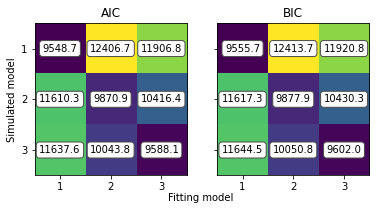

In [42]:
fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True)

axes[0].set_title("AIC")
axes[1].set_title("BIC")
axes[0].set_xticklabels([0,1,2,3])
axes[0].set_yticklabels([0,1,2,3])
axes[0].set_ylabel("Simulated model")
axes[0].matshow(aic_conf_mat)
axes[1].matshow(bic_conf_mat)
axes[0].xaxis.tick_bottom()
axes[1].xaxis.tick_bottom()
fig.text(0.51, 0.15, 'Fitting model', ha='center')
for (i, j), z in np.ndenumerate(aic_conf_mat):
    axes[0].text(j, i, '{:0.1f}'.format(z), ha='center', va='center',
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))

for (i, j), z in np.ndenumerate(bic_conf_mat):
    axes[1].text(j, i, '{:0.1f}'.format(z), ha='center', va='center',
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))

fig.savefig('../report/figures/part2/task10/confusion_matrix.pdf')